## Media Company case Study

**Problem Statement** :
A media company like NetFlix, HotStar, Voot had launched a show. Initially response was good, but later company witnessed a decline in viewership. The company wants to figure out what went wrong.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
media = pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [3]:
# as there is an extra column with NaN values, we can drop it
media = media.drop("Unnamed: 7", axis =1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


Information about columns
- **Date** : Date for show
- **Views_show** : Total number of viewers for particular date
- **Visitors** : Number of visitors who landed on show page
- **Views_platform** : Total number of views on platform e.g. HotStar
- **Ad_impression** : Marketing spent on show advertising
- **Cricket_match_india** : Is there a cricket match in which India is playing
- **Character_A** : A famous character in show who was suddenly disappeared in story plot


 Possible Reasons for viewership decrement
- Number of people  coming to platform are less
- Fewer people watching video
- Decrease in marketing spend
- Other competitive shows e.g IPL/cricket, other sports, elections
- Special Holidays in which people travel with family
- Twist in story

In [4]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [5]:
# since Date colums is marked as object, set it to date
media["Date"] = pd.to_datetime(media["Date"])
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null datetime64[ns]
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [6]:
# Creating a derived column "days" since show started 
# from datetime import date   

# d0 = date(2017, 2, 28)
# d1 = media["Date"];
# diff = d1 - d0    # Not working. Gives error as : TypeError: unsupported operand type(s) for -: 'DatetimeIndex' and 'datetime.date'
media["Days"] = media["Date"] - pd.to_datetime("2/28/2017")

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [7]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null datetime64[ns]
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Days                   80 non-null timedelta64[ns]
dtypes: datetime64[ns](1), int64(6), timedelta64[ns](1)
memory usage: 5.1 KB


In [8]:
# As Days column contains number + string ('days'). remove it
media['Days'] = media['Days'].astype(str)
media['Days'] = media['Days'].map( lambda x : x[0:2])
media['Days'] = media['Days'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [9]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null datetime64[ns]
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Days                   80 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(6)
memory usage: 4.8 KB


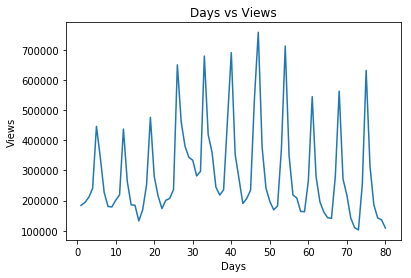

In [10]:
# plot relationship between Days and Views
plt.plot(media['Days'], media['Views_show'])
plt.title("Days vs Views")
plt.xlabel("Days")
plt.ylabel("Views")
plt.show()

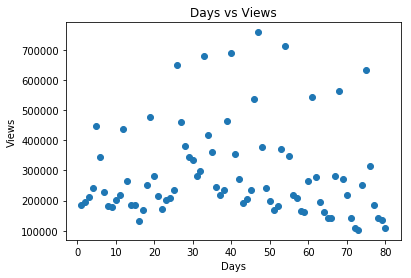

In [11]:
# Scatter plot for Days vs view
plt.scatter(media['Days'], media['Views_show'])
plt.title("Days vs Views")
plt.xlabel("Days")
plt.ylabel("Views")
plt.show()

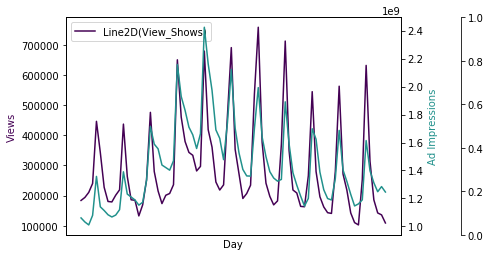

In [12]:
# plot for Days vs Views and Days vs Ad_Impressions
fig = plt.figure()
host = fig.add_subplot(111)

# Create a twin Axes sharing the xaxis
par1 = host.twinx()
par2 = host.twinx()

#Set Labels
host.set_xlabel("Day")
host.set_ylabel("Views")
par1.set_ylabel("Ad Impressions")

# decide colors
color1 = plt.cm.viridis(0)     #Make a colormap from a list of colors.
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0.9)

# plot
p1, = host.plot(media["Days"], media["Views_show"], color=color1, label="View_Shows")
p2, = par1.plot(media["Days"], media["Ad_impression"], color=color2, label="Ad Impressions")

# define legend
lgnd = [p1, p2]
host.legend(lgnd, loc="best")

# make y axis for Add impressions outward
par2.spines['right'].set_position(('outward', 60))

# no x ticks
par2.xaxis.set_ticks([])

# color labels on y axis
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("py_plot_multiple_y_axis.png", bbox_inches='tight')

In [14]:
#Generate a week day variable
media['weekDay']= (media['Days'] + 3)%7   #1 march 2017 is wednesday and starting from sunday its 4th day
media['weekDay'].replace(0,7, inplace=True)
media['weekDay'] = media['weekDay'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,weekDay
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


#### Running 1st Model LM1 with visitors and weekDay

In [18]:
# with Visitors and weekDay we are trying to find any relationship between viewers and day of week .
X = media[['Visitors', 'weekDay']]
y = media['Views_show']

In [20]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
#validating model with OLS APIs.
import statsmodels.api as sm

X_train_sm = X

# unlike sklearn, statsmodels dont automatically fit a constant.
# So, need to add constant manually using sm.add_constant(X)

X_train_sm = sm.add_constant(X_train_sm)

# Ordinary Least Squared Model
lm_l = sm.OLS(y, X_train_sm).fit()
lm_l.summary()

C:\Apps\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           8.01e-12
Time:                        09:35:58   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.720   -2.52e+05    1.75e+05
Visitors       0.2787      0.057      4.911      0.000       0.166       0.392
weekDay    -3.591e+04   6591.205     -5.448      0.000    -4.9e+04   -2.28e+04
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.653
Skew:                           0.423   Prob(JB):                        0.265
Kurtosis:                       2.718   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From Summary, R-Squared and adjusted R-Squared values are only 0.48 and 0.47. which means model is not that much good.
So, for this, we will consider only weekend days instedof weekdays

In [24]:
def isWeekEnd(i):
    if(i == 1 or i == 7):
        return 1
    else:
        return 0

media['weekEnd'] = [isWeekEnd(i) for i in media['weekDay']]
media.head()
    

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,weekDay,weekEnd
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


#### Running model with visitors and weekend (lm2)

In [26]:
X = media[['Visitors', 'weekEnd']]
y = media['Views_show']

X_train_sm = X

# unlike sklearn, statsmodels dont automatically fit a constant.
# So, need to add constant manually using sm.add_constant(X)

X_train_sm = sm.add_constant(X_train_sm)

# Ordinary Least Squared Model
lm_2 = sm.OLS(y, X_train_sm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           2.51e-12
Time:                        10:03:23   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekEnd     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From Summary, R-Squared and adjusted R-Squared values are slightyle improved, 0.50 and 0.48. but still means model is not that much good. So, for now, we will consider character_A column to find relationship between role for certain character in show.

#### Running model with visitors, weekend  and chatacter_a(lm3)

In [30]:
X = media[['Visitors', 'weekEnd', 'Character_A']]
y = media['Views_show']

X_train_sm = X

# unlike sklearn, statsmodels dont automatically fit a constant.
# So, need to add constant manually using sm.add_constant(X)

X_train_sm = sm.add_constant(X_train_sm)

# Ordinary Least Squared Model
lm_3 = sm.OLS(y, X_train_sm).fit()
lm_3.summary()

C:\Apps\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.53e-14
Time:                        10:08:55   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekEnd      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From Summary, R-Squared and adjusted R-Squared values are improved, 0.586 and 0.57. so definitely, certain role of character in show is causing viewership decline. Now try with Ad impressions column whether if affects the model or not

#### Running model with visitors, weekend, chatacter_a and ad impressions(lm4)

In [31]:
X = media[['Visitors', 'weekEnd', 'Character_A', 'Ad_impression']]
y = media['Views_show']

X_train_sm = X

# unlike sklearn, statsmodels dont automatically fit a constant.
# So, need to add constant manually using sm.add_constant(X)

X_train_sm = sm.add_constant(X_train_sm)

# Ordinary Least Squared Model
lm_4 = sm.OLS(y, X_train_sm).fit()
lm_4.summary()

C:\Apps\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.10e-25
Time:                        10:14:20   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067      0.000   -4.22e+05   -1.45e+05
Visitors          0.0144      0.042      0.340      0.735      -0.070       0.099
weekEnd        1.485e+05   2.04e+04      7.296      0.000    1.08e+05    1.89e+05
Character_A   -2.934e+04   2.16e+04     -1.356      0.179   -7.24e+04    1.38e+04
Ad_impression     0.0004   3.96e-05      9.090      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                     1.32e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 **Observations From Summary :**
- Coefficient for Character_A is negative. i.e. In earlier model lm_3, it has positive impact but in this model, it has negative impact. Either previous model was correct or this model is correct

- Also, P-value for Visitors is much higher 0.735. This may be case for multi-colinearity

- R-Squared and adjusted R-Squared values are improved significantly, 0.803 and 0.792.

#### Running model with weekend, chatacter_a and ad impressions(lm5)

In [33]:
X = media[['weekEnd', 'Character_A', 'Ad_impression']]
y = media['Views_show']

X_train_sm = X

# unlike sklearn, statsmodels dont automatically fit a constant.
# So, need to add constant manually using sm.add_constant(X)

X_train_sm = sm.add_constant(X_train_sm)

# Ordinary Least Squared Model
lm_5 = sm.OLS(y, X_train_sm).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        10:20:55   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekEnd         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 **Observations From Summary :**
- Coefficient for Character_A is still negative. 

- R-Squared and adjusted R-Squared values are almost same, 0.803 and 0.795.

- Ad Impression value is in millions. so we will scale it and divide is by 1 million

In [38]:
media["Ad_impression"] =  media["Ad_impression"]/1000000

#### Running model with weekend, chatacter_a,  ad impressions and Cricket MAtch for India (lm6)

In [39]:
X = media[['weekEnd', 'Character_A', 'Ad_impression', 'Cricket_match_india']]
y = media['Views_show']

X_train_sm = X

# unlike sklearn, statsmodels dont automatically fit a constant.
# So, need to add constant manually using sm.add_constant(X)

X_train_sm = sm.add_constant(X_train_sm)

# Ordinary Least Squared Model
lm_6 = sm.OLS(y, X_train_sm).fit()
lm_6.summary()

C:\Apps\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.02e-25
Time:                        10:26:17   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.633e+05    4.8e+04     -5.484      0.000   -3.59e+05   -1.68e+05
weekEnd              1.521e+05    1.9e+04      7.987      0.000    1.14e+05     1.9e+05
Character_A         -3.196e+04   2.19e+04     -1.457      0.149   -7.57e+04    1.17e+04
Ad_impression         363.7938     37.113      9.802      0.000     289.861     437.727
Cricket_match_india -1.396e+04   2.74e+04     -0.510      0.612   -6.85e+04    4.06e+04
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                     9.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 **Observations From Summary :**
- Coefficient for Character_A is still negative.

- Cricket_match_india is not causing much impact for viewership

- R-Squared and adjusted R-Squared values are almost same, 0.803 and 0.793.

- Ad Impression coefficient is improved.

#### Running model with weekend, chatacter_a,  ad impressions (lm7)

In [40]:
X = media[['weekEnd', 'Character_A', 'Ad_impression']]
y = media['Views_show']

X_train_sm = X

# unlike sklearn, statsmodels dont automatically fit a constant.
# So, need to add constant manually using sm.add_constant(X)

X_train_sm = sm.add_constant(X_train_sm)

# Ordinary Least Squared Model
lm_7 = sm.OLS(y, X_train_sm).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        10:29:55   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekEnd         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression   364.4670     36.909      9.875      0.000     290.957     437.977
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### as this is our final model, we can predict using these columns

In [42]:
y_pred = lm_7.predict(X_train_sm)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r_squared =  r2_score(y, y_pred)

print("mean_squared_error:", mse)
print("R- Squared value:", r_squared)

mean_squared_error: 4677651616.253406
R- Squared value: 0.8026434468575651


Text(0, 0.5, 'Views')

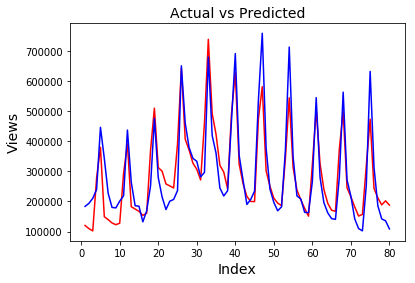

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, y_pred, color="red")
plt.plot(c, y, color="blue")
plt.title("Actual vs Predicted", fontsize=14)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Views", fontsize=14)

Text(0, 0.5, 'y-y_pred ')

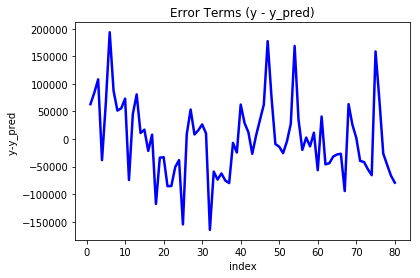

In [46]:
# Plotting Error terms
fig = plt.figure()
c = [i for i in range(1,81,1)]
plt.plot(c, y-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.title("Error Terms (y - y_pred)")
plt.xlabel("index")
plt.ylabel("y-y_pred ")